# Capstone Lab: Prediksi Penyakit Ikan

## Project Description

**Capstone Lab: Fish Disease Prediction** is a project that aims to develop a fish disease prediction system using data and machine learning technology. The fishing and aquaculture industry plays an important role in meeting global food needs. Fish health is one of the critical aspects in maintaining the productivity and quality of fishery products. With early detection of fish diseases, aquaculture farmers and managers can reduce the risk of disease spread, minimize economic losses, and increase production efficiency.

In this project, relevant data such as clinical symptoms, environmental factors, images of infected fish, and other parameters will be processed to build a prediction model. The development process includes data exploration, preprocessing, model training, performance evaluation, and model optimization to improve prediction accuracy.

## Tujuan Utama

1. Membangun model pembelajaran mesin untuk memprediksi kemungkinan ikan terkena penyakit berdasarkan data yang tersedia.
2. Memberikan rekomendasi atau sistem peringatan dini kepada petani ikan untuk mengambil langkah pencegahan.

## Teknologi yang Digunakan

- **Python** dan pustaka pembelajaran mesin seperti **TensorFlow** dan **Keras**.
- Visualisasi data menggunakan **Matplotlib** 
- Pengolahan data citra (jika ada data gambar) dengan **CNN** 

## Manfaat Proyek

- Membantu petani ikan dan pemilik akuakultur dalam mengidentifikasi penyakit ikan.
- Mengurangi kerugian finansial akibat wabah penyakit.
- Meningkatkan efisiensi dan kualitas produk perikanan.

Dengan proyek ini, diharapkan pengelolaan kesehatan ikan dapat lebih optimal, memberikan dampak positif terhadap industri perikanan secara keseluruhan, serta memperkuat keberlanjutan dan ketahanan pangan global.

## Import Library

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [6]:
BASE_DIR = 'ifihsy_dataset/ifihsy_dataset'

train_dir = os.path.join(BASE_DIR, 'Train')
validation_dir = os.path.join(BASE_DIR, 'Test')

In [8]:
train_aeromoniasis_dir = os.path.join(train_dir, 'Bacterial diseases - Aeromoniasis')
train_gill_dir = os.path.join(train_dir, 'Bacterial gill disease')
train_red_dir = os.path.join(train_dir, 'Bacterial Red disease')
train_saprolegniasis_dir = os.path.join(train_dir, 'Fungal diseases Saprolegniasis')
train_healthy_dir = os.path.join(train_dir, 'Healthy Fish')
train_parasitic_dir = os.path.join(train_dir, 'Parasitic diseases')
train_white_dir = os.path.join(train_dir, 'Viral diseases White tail disease')

In [9]:
val_aeromoniasis_dir = os.path.join(validation_dir, 'Bacterial diseases - Aeromoniasis')
val_gill_dir = os.path.join(validation_dir, 'Bacterial gill disease')
val_red_dir = os.path.join(validation_dir, 'Bacterial Red disease')
val_saprolegniasis_dir = os.path.join(validation_dir, 'Fungal diseases Saprolegniasis')
val_healthy_dir = os.path.join(validation_dir, 'Healthy Fish')
val_parasitic_dir = os.path.join(validation_dir, 'Parasitic diseases')
val_white_dir = os.path.join(validation_dir, 'Viral diseases White tail disease')

In [10]:
print(f"Total training Aeromoniasis images: {len(os.listdir(train_aeromoniasis_dir))}")
print(f"Total training Gill disease images: {len(os.listdir(train_gill_dir))}")
print(f"Total training Red disease images: {len(os.listdir(train_red_dir))}")
print(f"Total training Saprolegniasis images: {len(os.listdir(train_saprolegniasis_dir))}")
print(f"Total training Healthy Fish images: {len(os.listdir(train_healthy_dir))}")
print(f"Total training Parasitic disease images: {len(os.listdir(train_parasitic_dir))}")
print(f"Total training White tail disease images: {len(os.listdir(train_white_dir))}")

Total training Aeromoniasis images: 200
Total training Gill disease images: 200
Total training Red disease images: 200
Total training Saprolegniasis images: 200
Total training Healthy Fish images: 200
Total training Parasitic disease images: 200
Total training White tail disease images: 200


In [11]:
print(f"Total validation Aeromoniasis images: {len(os.listdir(val_aeromoniasis_dir))}")
print(f"Total validation Gill disease images: {len(os.listdir(val_gill_dir))}")
print(f"Total validation Red disease images: {len(os.listdir(val_red_dir))}")
print(f"Total validation Saprolegniasis images: {len(os.listdir(val_saprolegniasis_dir))}")
print(f"Total validation Healthy Fish images: {len(os.listdir(val_healthy_dir))}")
print(f"Total validation Parasitic disease images: {len(os.listdir(val_parasitic_dir))}")
print(f"Total validation White tail disease images: {len(os.listdir(val_white_dir))}")

Total validation Aeromoniasis images: 50
Total validation Gill disease images: 50
Total validation Red disease images: 50
Total validation Saprolegniasis images: 50
Total validation Healthy Fish images: 50
Total validation Parasitic disease images: 50
Total validation White tail disease images: 50


## Data Augmentasion

In [12]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1392 images belonging to 7 classes.
Found 346 images belonging to 7 classes.


## Initialisation Model With Densenet50

In [13]:
input_tensor = Input(shape=(224, 224, 3))

base_model = DenseNet201(weights='densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                         include_top=False, input_tensor=input_tensor)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output_tensor = Dense(7, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output_tensor)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 19,470,663 (74.27 MB)

 Trainable params: 19,241,607 (73.40 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [15]:
for x, y in train_generator:
    print(x.shape, y.shape)
    break

(32, 224, 224, 3) (32, 7)


In [19]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=valid_generator
)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 408s 8s/step - accuracy: 0.1835 - loss: 2.1028 - val_accuracy: 0.4075 - val_loss: 1.6320
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 304s 7s/step - accuracy: 0.3602 - loss: 1.6527 - val_accuracy: 0.5578 - val_loss: 1.3004
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 303s 7s/step - accuracy: 0.5451 - loss: 1.2761 - val_accuracy: 0.7023 - val_loss: 1.0063
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 300s 7s/step - accuracy: 0.6613 - loss: 0.9633 - val_accuracy: 0.8064 - val_loss: 0.6395
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.7865 - loss: 0.6209 - val_accuracy: 0.8439 - val_loss: 0.5205
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.8641 - loss: 0.4158 - val_accuracy: 0.8526 - val_loss: 0.4872
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 303s 7s/step - accuracy: 0.9193 - loss: 0.2423 - val_accuracy: 0.8902 - val_loss: 0.4030
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 301s 7s/step - accuracy: 0.9502 - loss: 0.1688 - val_accuracy: 0.

## Visualization

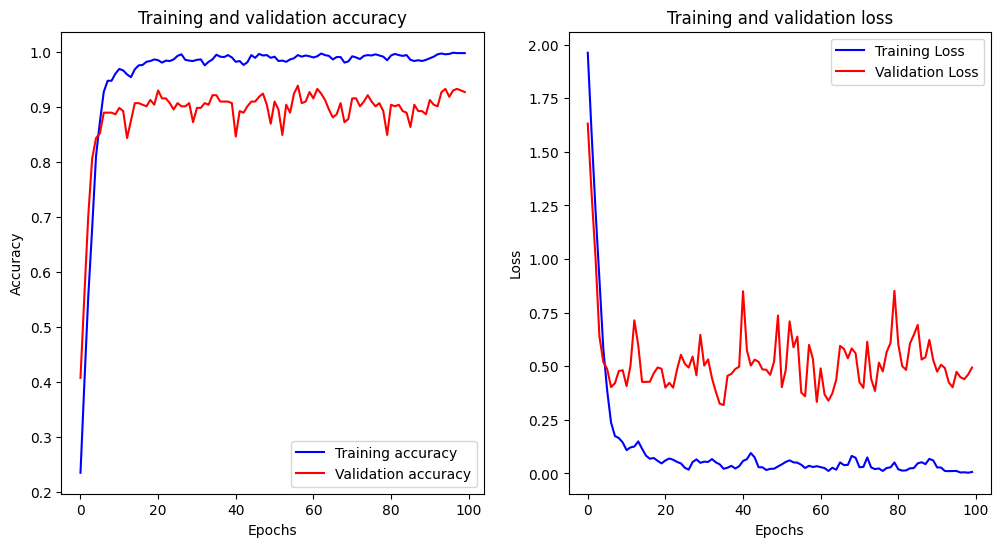

In [20]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'b-', label='Training accuracy')  
    ax[0].plot(epochs, val_acc, 'r-', label='Validation accuracy')  
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'b-', label='Training Loss')  
    ax[1].plot(epochs, val_loss, 'r-', label='Validation Loss')  
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)


**save to h.5**

In [21]:
model.save('ifishy_disease_model.h5')

## Test Prediction

In [3]:
load_model = tf.keras.models.load_model('pretrained/ifishy_disease_model.h5')
def predict_and_display(image_path, load_model, class_labels):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = load_model.predict(img_array)
    predicted_class = np.argmax(predictions)

    print(f"Predicted Class: {class_labels[predicted_class]}")
    plt.imshow(img)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Class: Parasitic diseases


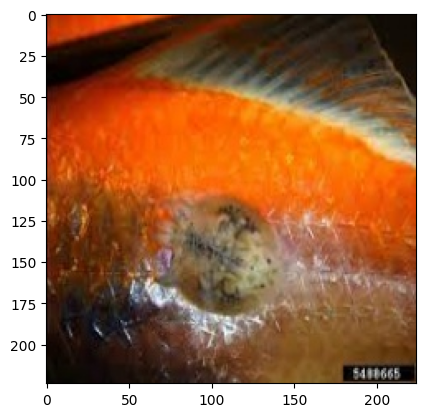

In [9]:
class_labels = {
    0: 'Bacterial diseases - Aeromoniasis',
    1: 'Bacterial gill disease',
    2: 'Bacterial Red disease',
    3: 'Fungal diseases Saprolegniasis',
    4: 'Healthy Fish',
    5: 'Parasitic diseases',
    6: 'Viral diseases White tail disease'
}
sample_image_path = 'test_model/test_parasitic2.jpeg'
predict_and_display(sample_image_path, load_model, class_labels)